In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

In [2]:
def right_side(t, v):
    u, du, ddu = v[0], v[1], v[2]
    return np.array([du, ddu, -u*ddu/2])

def initial_problem_value(u0, du0, ddu0, f=right_side, t=0, tf=10):
    u0 = np.array([u0, du0, ddu0])
    initial_sol = scipy.integrate.solve_ivp(f, [t, tf], u0)
    last_sol = initial_sol.y[1, -1]
    return initial_sol, last_sol

def g(alpha):
    return initial_problem_value(0.0, 0.0, alpha)[1] - 1

t0 = 0
tf = 20

alpha = scipy.optimize.bisect(g, 0.0, 2.0)
sol, _ = initial_problem_value(0.0, 0.0, alpha, right_side, t0, tf)


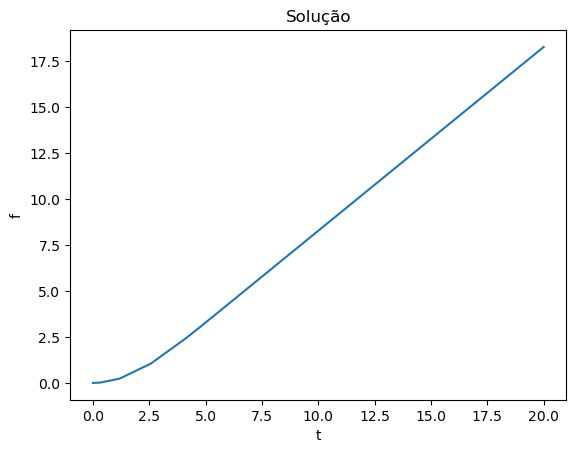

In [3]:
t0 = 0
tf = 20

alpha = scipy.optimize.bisect(g, 0.0, 2.0)
sol, _ = initial_problem_value(0.0, 0.0, alpha, right_side, t0, tf)

n = sol.t
f = sol.y[0]
df = sol.y[1]
ddf = sol.y[2]

plt.plot(n, f)
plt.title('Solução')
plt.xlabel('t')
plt.ylabel('f')
plt.show()